Epoch 1/50
25/25 [==============================] - 2s 21ms/step - loss: 0.9829 - val_loss: 1.0742
Epoch 2/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9838 - val_loss: 1.0774
Epoch 3/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9782 - val_loss: 1.0781
Epoch 4/50
25/25 [==============================] - 0s 11ms/step - loss: 0.9759 - val_loss: 1.0809
Epoch 5/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9762 - val_loss: 1.0838
Epoch 6/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9750 - val_loss: 1.0878
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9729 - val_loss: 1.0922
Epoch 8/50
25/25 [==============================] - 0s 10ms/step - loss: 0.9719 - val_loss: 1.0942
Epoch 9/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9700 - val_loss: 1.1023
Epoch 10/50
25/25 [==============================] - 0s 8ms/step - loss: 0.9684 - val_loss: 1.1044
Epoch 11/50
25

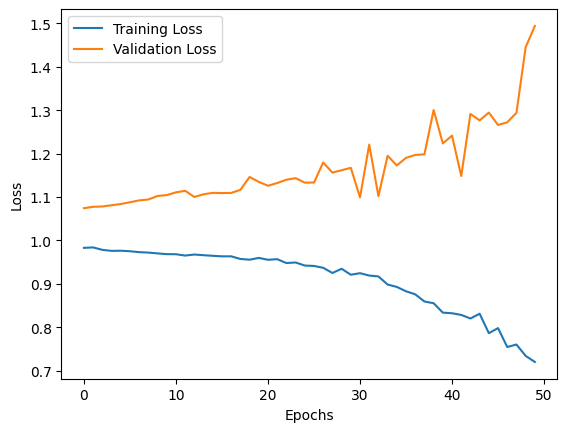

7/7 [==============================] - 0s 4ms/step


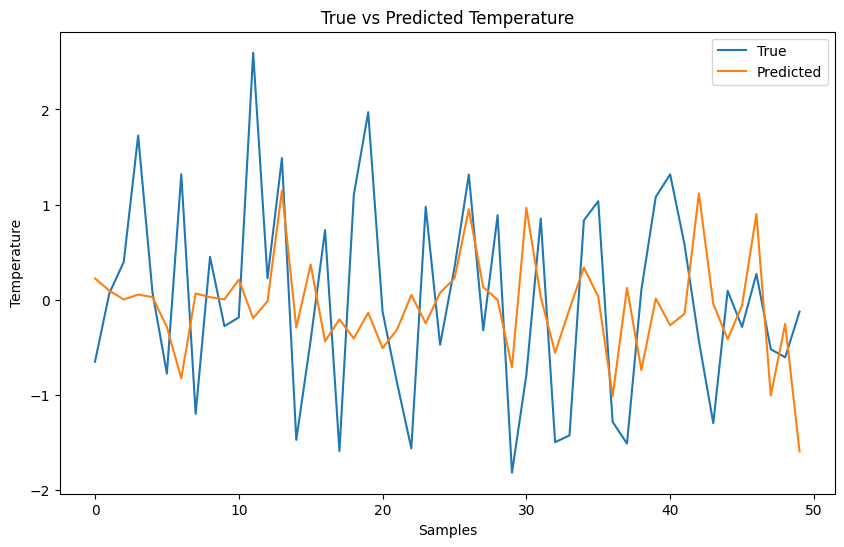

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Generate synthetic weather data (you will replace this with your actual weather data)
# Let's assume we have daily temperature and humidity readings for a city over a period of time
# X will contain both temperature and humidity readings, and y will contain the temperature for the next day
num_samples = 1000
seq_length = 10  # Number of past days to consider
input_dim = 2  # Temperature and humidity
output_dim = 1  # Temperature
X = np.random.randn(num_samples, seq_length, input_dim)
y = np.random.randn(num_samples, output_dim)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
inputs = Input(shape=(seq_length, input_dim))
lstm = LSTM(64, activation='relu')(inputs)
outputs = Dense(output_dim)(lstm)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate predictions on the test set
predictions = model.predict(X_test)

# Plot some predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test[:50], label='True')
plt.plot(predictions[:50], label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Temperature')
plt.legend()
plt.title('True vs Predicted Temperature')
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Example weather prediction data (replace this with your actual data)
# Assume X contains weather images and y contains binary labels (e.g., sunny or rainy)
X = np.random.randn(1000, 64, 64, 3)  # Example input data (images)
y = np.random.randint(0, 2, size=(1000,))  # Example target data (binary labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)


Epoch 1/10
25/25 [==============================] - 7s 244ms/step - loss: 0.7297 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5450
Epoch 2/10
25/25 [==============================] - 6s 240ms/step - loss: 0.6926 - accuracy: 0.5063 - val_loss: 0.6889 - val_accuracy: 0.5550
Epoch 3/10
25/25 [==============================] - 5s 220ms/step - loss: 0.6915 - accuracy: 0.5312 - val_loss: 0.6876 - val_accuracy: 0.5550
Epoch 4/10
25/25 [==============================] - 8s 317ms/step - loss: 0.6881 - accuracy: 0.5400 - val_loss: 0.6958 - val_accuracy: 0.4400
Epoch 5/10
25/25 [==============================] - 5s 219ms/step - loss: 0.6929 - accuracy: 0.5250 - val_loss: 0.6962 - val_accuracy: 0.4450
Epoch 6/10
25/25 [==============================] - 7s 267ms/step - loss: 0.6899 - accuracy: 0.5462 - val_loss: 0.6874 - val_accuracy: 0.5550
Epoch 7/10
25/25 [==============================] - 5s 218ms/step - loss: 0.6912 - accuracy: 0.5200 - val_loss: 0.6943 - val_accuracy: 0.4400
Epoch 

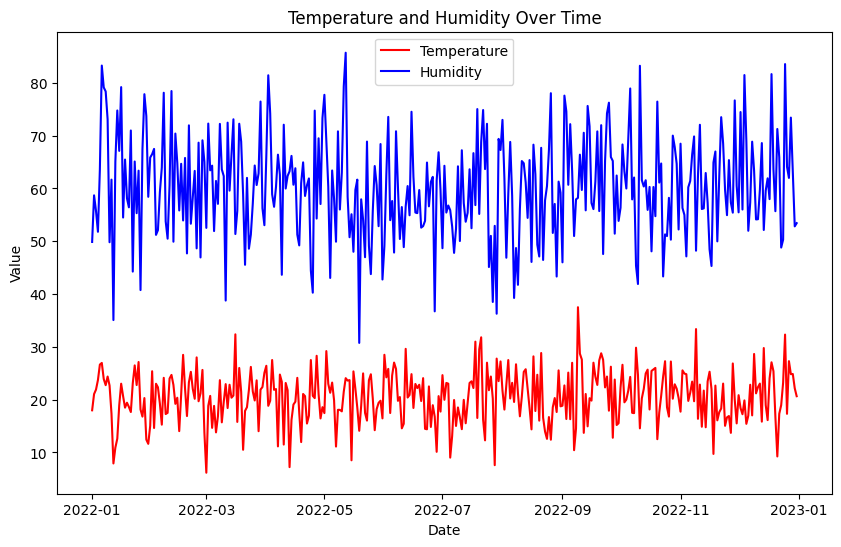

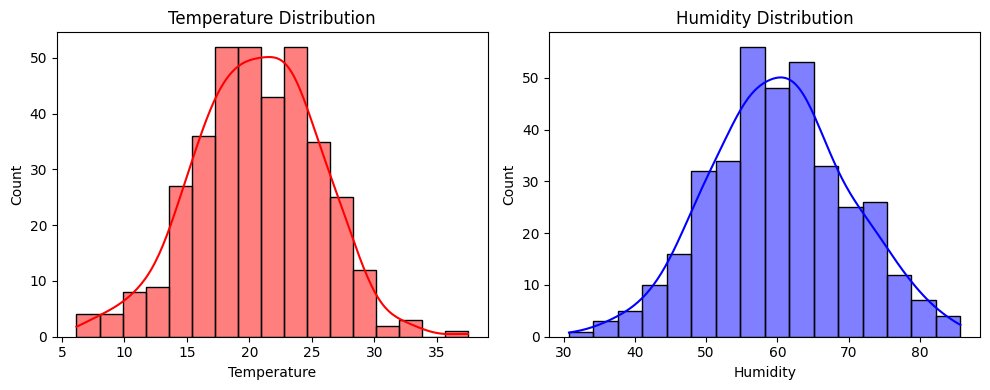

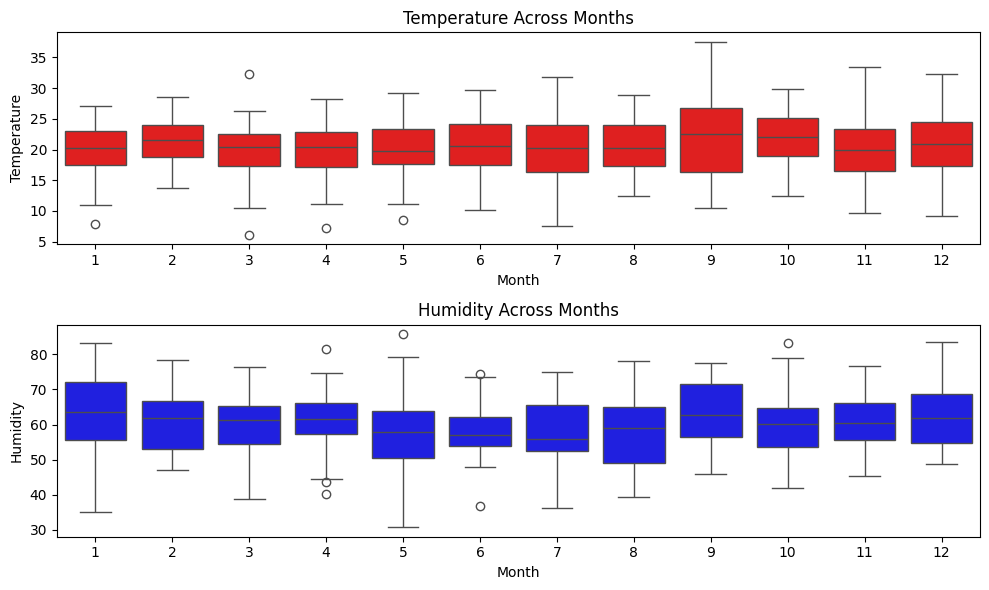

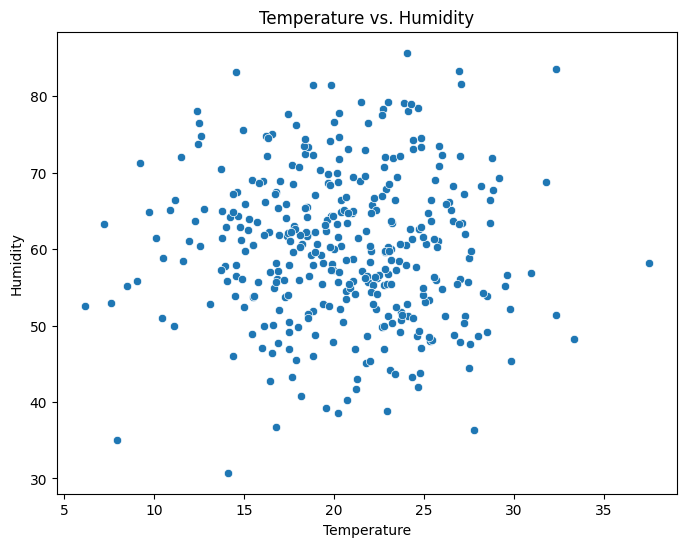

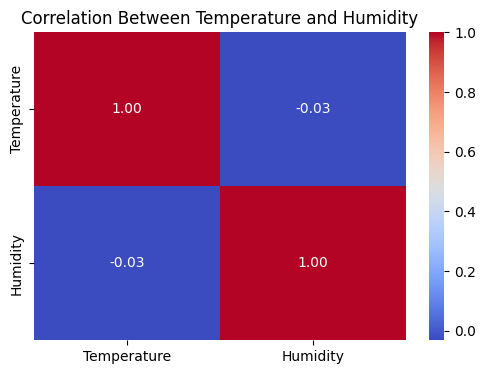

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example weather prediction data (replace this with your actual data)
# Assuming you have a DataFrame named 'weather_data'
# weather_data = pd.read_csv('your_weather_dataset.csv')

# Sample weather prediction data (replace this with your actual data)
dates = pd.date_range(start='2022-01-01', end='2022-12-31', freq='D')
temperature = np.random.normal(loc=20, scale=5, size=len(dates))
humidity = np.random.normal(loc=60, scale=10, size=len(dates))
weather_data = pd.DataFrame({'Date': dates, 'Temperature': temperature, 'Humidity': humidity})

# Time Series Plot: Temperature and Humidity over time
plt.figure(figsize=(10, 6))
plt.plot(weather_data['Date'], weather_data['Temperature'], label='Temperature', color='red')
plt.plot(weather_data['Date'], weather_data['Humidity'], label='Humidity', color='blue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Temperature and Humidity Over Time')
plt.legend()
plt.show()

# Histograms: Distribution of Temperature and Humidity
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(weather_data['Temperature'], kde=True, color='red')
plt.title('Temperature Distribution')
plt.subplot(1, 2, 2)
sns.histplot(weather_data['Humidity'], kde=True, color='blue')
plt.title('Humidity Distribution')
plt.tight_layout()
plt.show()

# Boxplots: Temperature and Humidity across months
weather_data['Month'] = weather_data['Date'].dt.month
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x='Month', y='Temperature', data=weather_data, color='red')
plt.title('Temperature Across Months')
plt.subplot(2, 1, 2)
sns.boxplot(x='Month', y='Humidity', data=weather_data, color='blue')
plt.title('Humidity Across Months')
plt.tight_layout()
plt.show()

# Scatter Plot: Temperature vs. Humidity
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperature', y='Humidity', data=weather_data)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Temperature vs. Humidity')
plt.show()

# Heatmap: Correlation between Temperature and Humidity
corr = weather_data[['Temperature', 'Humidity']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Temperature and Humidity')
plt.show()
